In [52]:
import numpy as np
import matplotlib.pyplot as plt


In [53]:
x = np.array([1,2,3,4])
y = np.array([2,2.8,3.6,4.5])


In [54]:
w = 0
b = 0
alpha = 0.01
num_iteration = 20


In [55]:
sse_value = []

for i in range(num_iteration):
    y_hat = w * x + b
    D_w = 2 * np.sum((y_hat - y)* x) #Delta W
    D_b = 2 * np.sum(y_hat - y) * 1  #Delta b
    
    w -= alpha * D_w # New value of w
    b -= alpha * D_b # New value of b
    
    sse = (np.sum(y_hat - y)**2)
    sse_value.append(sse)
    if (i+1) % 20 == 0:
        print(f"iteration{i+1}, sse:{sse}, optimized_param: bias = {b}, slope is: {w}")

iteration20, sse:0.13720282157124256, optimized_param: bias = 0.5388025938800368, slope is: 1.0378816512559883


In [56]:
y_new_line = w * 5 + b
y_new_line

np.float64(5.728210850159979)

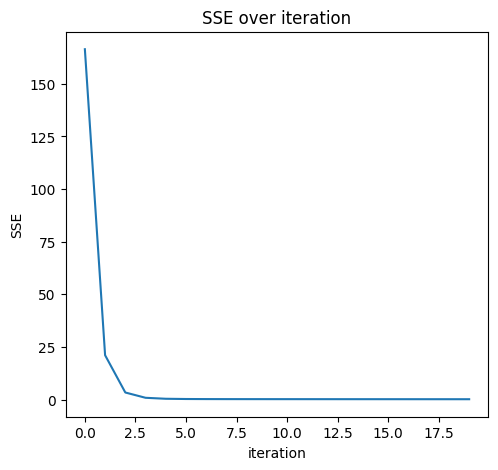

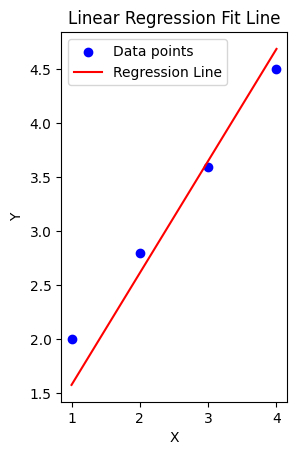

In [57]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(num_iteration),sse_value, label = "sse")
plt.xlabel("iteration")
plt.ylabel("SSE")
plt.title("SSE over iteration")
plt.show()
plt.subplot(1,2,2)
plt.scatter(x,y,color="blue",label= "Data points")
plt.plot(x,w*x+b, color="red", label= "Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Fit Line")
plt.legend()
plt.show()

In [58]:
class LinearRegression:
    
    def __init__(self):
        pass

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error, root_mean_squared_error

import warnings
warnings.filterwarnings("ignore")


In [60]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<Figure size 300x300 with 0 Axes>

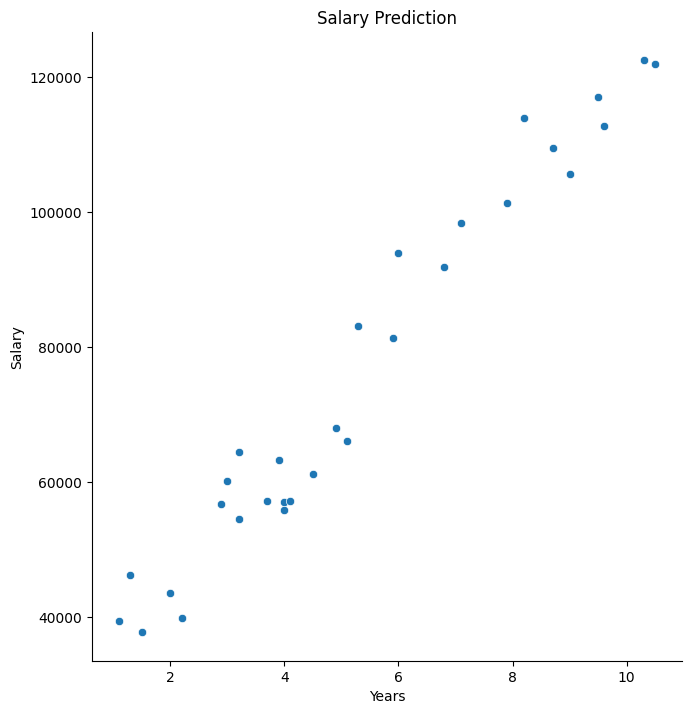

In [61]:
plt.figure(figsize=(3,3))
sns.pairplot(data, x_vars=["YearsExperience"], y_vars=["Salary"],size = 7, kind = "scatter")
plt.xlabel("Years")
plt.ylabel("Salary")
plt.title("Salary Prediction")
plt.show()

In [62]:
x = data.iloc[:,:-1]
y = data.iloc[:,1]

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8, random_state=10)


In [64]:
x_train

,YearsExperience
13,4.1
27,9.6
12,4.0
1,1.3
19,6.0
14,4.5
18,5.9
6,3.0
11,4.0
23,8.2


In [65]:
x_test

,YearsExperience
20,6.8
7,3.2
5,2.9
2,1.5
3,2.0
21,7.1


In [66]:
reg_model = LinearRegression()
reg_model.fit(x_train,y_train)
pred_x = reg_model.predict(x_train)
pred_y = reg_model.predict(x_test)

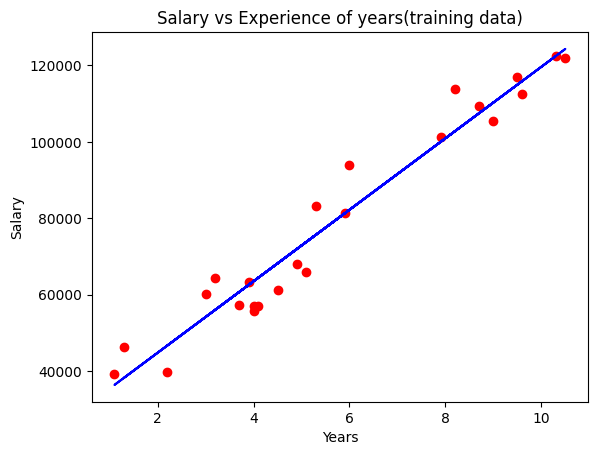

In [67]:
plt.scatter(x_train,y_train, color= "red")
plt.plot(x_train,pred_x,color="blue")
plt.title("Salary vs Experience of years(training data)")
plt.xlabel("Years")
plt.ylabel("Salary")
plt.show()

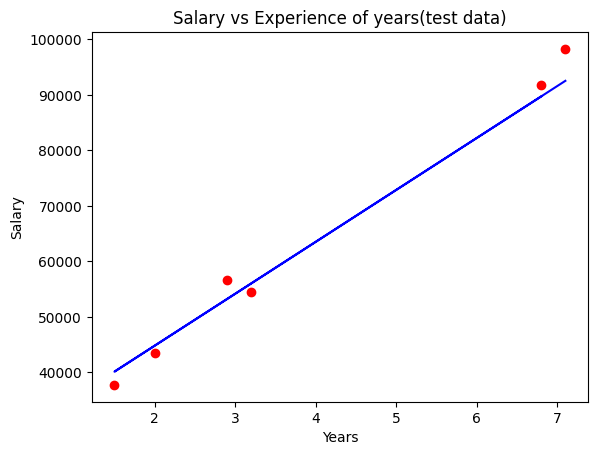

In [68]:
plt.scatter(x_test,y_test, color= "red")
plt.plot(x_test,pred_y,color="blue")
plt.title("Salary vs Experience of years(test data)")
plt.xlabel("Years")
plt.ylabel("Salary")
plt.show()

In [69]:
y_pred = reg_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
rsq = root_mean_squared_error(y_test,y_pred)
print(mse)
print("*" * 50)
print(rsq)
print("*" * 50)
print(x_test)
print("*" * 50)
print(y_pred)
print("*" * 50)
print(y_test)
print("*" * 50)
r2 = r2_score(y_test,y_pred)
print(r2)

9785570.138914317
**************************************************
3128.189594464235
**************************************************
    YearsExperience
20              6.8
7               3.2
5               2.9
2               1.5
3               2.0
21              7.1
**************************************************
[89715.76498848 56031.05821174 53223.99931368 40124.39112273
 44802.8226195  92522.82388655]
**************************************************
20    91738.0
7     54445.0
5     56642.0
2     37731.0
3     43525.0
21    98273.0
Name: Salary, dtype: float64
**************************************************
0.9816423482070253


In [70]:
reg_model.intercept_ # bias

np.float64(26089.096632416724)

In [71]:
reg_model.coef_ # Slope

array([9356.86299354])

In [72]:
x = float(input("Please Enter your Experience"))
y_hat = 9356 * x + 26089
print(y_hat)

213209.0


In [73]:
dataset = pd.read_csv("datadata.txt")

In [74]:
dataset

,X,y
0,1,2
1,2,4
2,3,6
3,4,8


In [75]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [76]:
x

,X
0,1
1,2
2,3
3,4


In [77]:
y

0    2
1    4
2    6
3    8
Name:  y , dtype: int64

In [78]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(x,y)
lin.coef_

array([2.])

In [79]:
from sklearn.linear_model import Ridge, Lasso
l = 10
Ridge = Ridge(alpha=1)
Ridge.fit(x,y)
Ridge.coef_

array([1.66666667])

In [80]:
from sklearn.linear_model import Lasso

# Define your variable
l = 1  # Try changing this value now

# Pass 'l' into the alpha parameter
# Note: I renamed the instance to 'lasso_model' to avoid overwriting the class name
lasso_model = Lasso(alpha=l) 

lasso_model.fit(x, y)
print(lasso_model.coef_)

[1.2]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, adjusted_
import warnings
warnings.filterwarnings('ignore')


<Figure size 300x300 with 0 Axes>

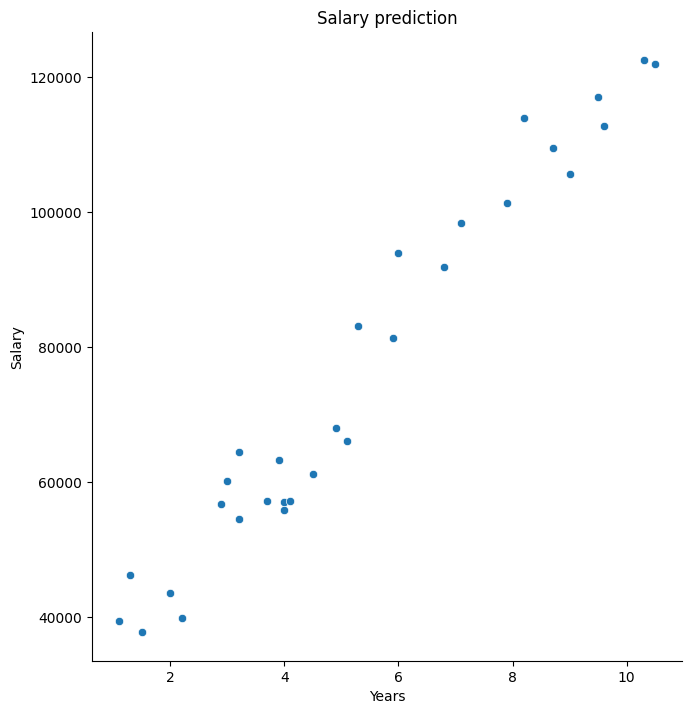

In [82]:
data = pd.read_csv('Salary_Data.csv')

data.head()

plt.figure(figsize=(3,3))

sns.pairplot(data, x_vars=["YearsExperience"], y_vars=["Salary"], size= 7 , kind= "scatter")

plt.xlabel("Years")

plt.ylabel("Salary")

plt.title("Salary prediction")

plt.show()

x = data.iloc[:,:-1]

 

y = data.iloc[:,1]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=10)



In [83]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [91]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
x_poly_train = poly.fit_transform(x_train)
x_poly_test  = poly.fit_transform(x_test)
x_poly_train

array([[1.00000000e+00, 4.10000000e+00, 1.68100000e+01, 6.89210000e+01,
        2.82576100e+02, 1.15856201e+03],
       [1.00000000e+00, 9.60000000e+00, 9.21600000e+01, 8.84736000e+02,
        8.49346560e+03, 8.15372698e+04],
       [1.00000000e+00, 4.00000000e+00, 1.60000000e+01, 6.40000000e+01,
        2.56000000e+02, 1.02400000e+03],
       [1.00000000e+00, 1.30000000e+00, 1.69000000e+00, 2.19700000e+00,
        2.85610000e+00, 3.71293000e+00],
       [1.00000000e+00, 6.00000000e+00, 3.60000000e+01, 2.16000000e+02,
        1.29600000e+03, 7.77600000e+03],
       [1.00000000e+00, 4.50000000e+00, 2.02500000e+01, 9.11250000e+01,
        4.10062500e+02, 1.84528125e+03],
       [1.00000000e+00, 5.90000000e+00, 3.48100000e+01, 2.05379000e+02,
        1.21173610e+03, 7.14924299e+03],
       [1.00000000e+00, 3.00000000e+00, 9.00000000e+00, 2.70000000e+01,
        8.10000000e+01, 2.43000000e+02],
       [1.00000000e+00, 4.00000000e+00, 1.60000000e+01, 6.40000000e+01,
        2.56000000e+02, 

In [92]:
poly_model = LinearRegression()
poly_model.fit(x_poly_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [93]:
y_poly_predict_train =  poly_model.predict(x_poly_train)
y_poly_predict_test =  poly_model.predict(x_poly_test)

In [94]:
x_range = np.linspace(x.min(),x.max(),100).reshape(-1,1) ## لسه مش فاهمه
x_range_poly = poly.transform(x_range)
y_range_pred = poly_model.predict(x_range_poly)


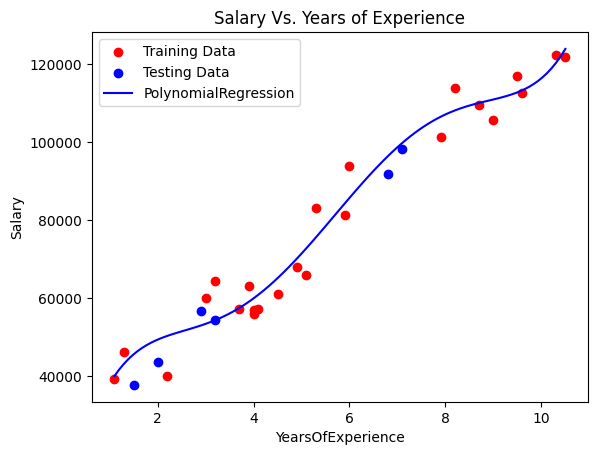

In [95]:
plt.scatter(x_train,y_train, color= "red", label= "Training Data")
plt.scatter(x_test, y_test, color= "blue", label= "Testing Data")
plt.plot(x_range,y_range_pred, color="blue", label= "PolynomialRegression")
plt.title("Salary Vs. Years of Experience")
plt.xlabel("YearsOfExperience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [101]:
mse = mean_squared_error(y_test,y_poly_predict_test)
r2 = r2_score(y_test, y_poly_predict_test)
print("MSE:", mse)
print("R2:", r2)
print("intercept of model:", poly_model.intercept_)
print("Coefficient of Model:", poly_model.coef_)


MSE: 22185118.39320876
R2: 0.9583808942486789
intercept of model: -18.31963360942609
Coefficient of Model: [ 0.00000000e+00  6.10974561e+04 -2.89071020e+04  6.53272094e+03
 -6.35838407e+02  2.22178148e+01]


In [102]:
pip install tkintertable

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for tkintertable: filename=tkintertable-1.3.3-py3-none-any.whl size=66249 sha256=c92119c66df91e966d07e8158b38df09706e02ce5b00025d1ac43ad20784fc59
  Stored in directory: c:\users\muham\appdata\local\pip\cache\wheels\93\b5\2d\e0c1d9fad21eeab6171702bc918627821cb2c46aecc7e69bb9
Successfully built tkintertable

   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   -------------------------------------